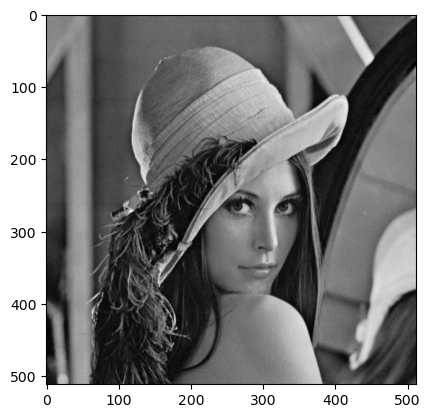

In [2]:
'''
    DPCM编码
'''
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('image/lena.jpg',0)
# 查看原图
plt.imshow(img,cmap="gray")

In [3]:
img.shape

(512, 512)

C:\Users\mar\AppData\Local\Temp\ipykernel_17748\1459180466.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
  predErr = Buffer_y[i * w + j] - prediction


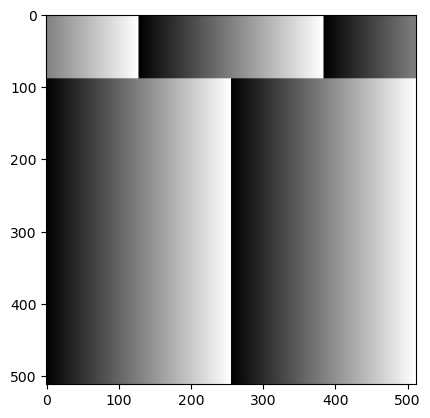

In [4]:
h, w = img.shape
# DPCM编码测试
Buffer_d = np.zeros((h * w), dtype=np.uint8)
Buffer_y = img.reshape(h * w)
Buffer_r = Buffer_d
# 1 bit重构
x = 2 ** (8-1)
y = 2 ** (9-1)
for i in range(0, h):
    prediction = 128
    pred_error = Buffer_y[i * w] - prediction
    tmp = (pred_error + 128) // x
    Buffer_d[i * w] = tmp
    inv_pred_error = Buffer_d[i * w] * x - 128
    Buffer_r[i * w] = inv_pred_error + prediction
    for j in range(1, w):
        prediction = Buffer_r[i * w + j - 1]
        predErr = Buffer_y[i * w + j] - prediction
        tmp = (predErr + 255) // y
        Buffer_d[i * w + j] = tmp
        invPredErr = Buffer_d[i * w + j] * y - 255
        Buffer_r[i * w + j] = invPredErr + prediction
Buffer_d = Buffer_d.reshape(h, w)
Buffer_r = Buffer_r.reshape(h, w)
# 查看图片
plt.imshow(Buffer_r,cmap="gray")

In [5]:
# 计算PSNR值
def PSNR(img1, img2):
    MSE = np.mean((img1/255. - img2/255.)**2)
    if MSE < 1.0e-10:
        return 100
    MAX = 1
    return 20*math.log10(MAX/math.sqrt(MSE))
PSNR(img, Buffer_r)

8.764816952140498

In [6]:
# 计算SSIM值，可以直接调库
from skimage.metrics import structural_similarity as ssim
print(ssim(img, Buffer_r))

0.3810345142348392


In [7]:
# 封装DPCM
def DPCM(Buffer_y, Buffer_d, Buffer_r, h, w, bit):
    # n bit重构
    x = 2 ** (8-bit)
    y = 2 ** (9-bit)
    for i in range(0, h):
        prediction = 128
        pred_error = Buffer_y[i * w] - prediction
        tmp = (pred_error + 128) // x
        Buffer_d[i * w] = tmp
        inv_pred_error = Buffer_d[i * w] * x - 128
        Buffer_r[i * w] = inv_pred_error + prediction
        for j in range(1, w):
            prediction = Buffer_r[i * w + j - 1]
            predErr = Buffer_y[i * w + j] - prediction
            tmp = (predErr + 255) // y
            Buffer_d[i * w + j] = tmp
            invPredErr = Buffer_d[i * w + j] * y - 255
            Buffer_r[i * w + j] = invPredErr + prediction

C:\Users\mar\AppData\Local\Temp\ipykernel_17748\3614196589.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  predErr = Buffer_y[i * w + j] - prediction


PSNR: 8.764816952140498SSIM: 0.497370701284829


C:\Users\mar\AppData\Local\Temp\ipykernel_17748\3399588996.py:16: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print("PSNR: " + str(PSNR(img, Buffer_r))  +"SSIM: " + str(ssim(img, Buffer_r, multichannel=True)))


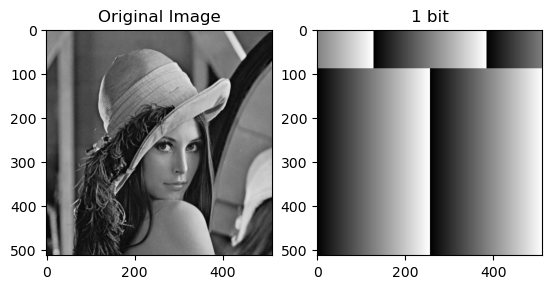

In [20]:
# 1 bit 重构
Buffer_d = np.zeros((h * w), dtype=np.uint8)
Buffer_y = img.reshape(h * w)
Buffer_r = Buffer_d
DPCM(Buffer_y, Buffer_d, Buffer_r, h, w, 1)
Buffer_d = Buffer_d.reshape(h, w)
Buffer_r = Buffer_r.reshape(h, w)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(Buffer_r, cmap="gray")
plt.title('1 bit')
print("PSNR: " + str(PSNR(img, Buffer_r))  +"SSIM: " + str(ssim(img, Buffer_r, multichannel=True)))

C:\Users\mar\AppData\Local\Temp\ipykernel_17748\3614196589.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  predErr = Buffer_y[i * w + j] - prediction


PSNR: 8.015757404307763SSIM: 0.3603057826544922


C:\Users\mar\AppData\Local\Temp\ipykernel_17748\1320751598.py:16: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print("PSNR: " + str(PSNR(img, Buffer_r))  +"SSIM: " + str(ssim(img, Buffer_r, multichannel=True)))


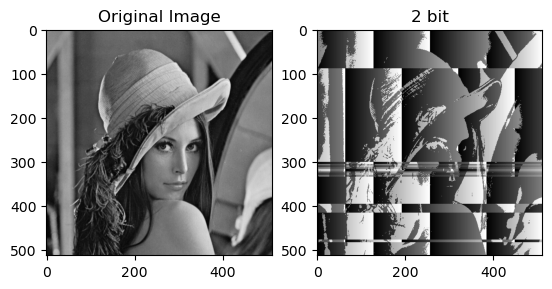

In [22]:
# 2 bit 重构
Buffer_d = np.zeros((h * w), dtype=np.uint8)
Buffer_y = img.reshape(h * w)
Buffer_r = Buffer_d
DPCM(Buffer_y, Buffer_d, Buffer_r, h, w, 2)
Buffer_d = Buffer_d.reshape(h, w)
Buffer_r = Buffer_r.reshape(h, w)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(Buffer_r, cmap="gray")
plt.title('2 bit')
print("PSNR: " + str(PSNR(img, Buffer_r))  +"SSIM: " + str(ssim(img, Buffer_r, multichannel=True)))

C:\Users\mar\AppData\Local\Temp\ipykernel_17748\3614196589.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  predErr = Buffer_y[i * w + j] - prediction


PSNR: 22.120525068441303SSIM: 0.6680918886456162


C:\Users\mar\AppData\Local\Temp\ipykernel_17748\4186752325.py:16: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print("PSNR: " + str(PSNR(img, Buffer_r))  +"SSIM: " + str(ssim(img, Buffer_r, multichannel=True)))


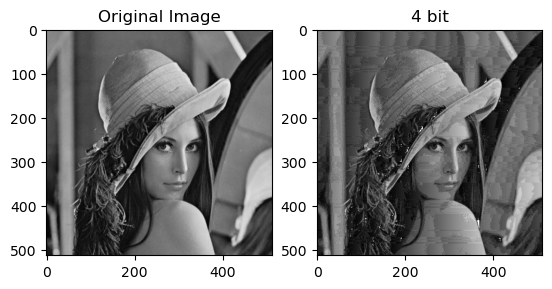

In [23]:
# 4 bit 重构
Buffer_d = np.zeros((h * w), dtype=np.uint8)
Buffer_y = img.reshape(h * w)
Buffer_r = Buffer_d
DPCM(Buffer_y, Buffer_d, Buffer_r, h, w, 4)
Buffer_d = Buffer_d.reshape(h, w)
Buffer_r = Buffer_r.reshape(h, w)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(Buffer_r, cmap="gray")
plt.title('4 bit')
print("PSNR: " + str(PSNR(img, Buffer_r))  +"SSIM: " + str(ssim(img, Buffer_r, multichannel=True)))

C:\Users\mar\AppData\Local\Temp\ipykernel_17748\3614196589.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  predErr = Buffer_y[i * w + j] - prediction


PSNR: 51.13067886450962SSIM: 0.9973100626115454


C:\Users\mar\AppData\Local\Temp\ipykernel_17748\3004801558.py:16: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print("PSNR: " + str(PSNR(img, Buffer_r))  +"SSIM: " + str(ssim(img, Buffer_r, multichannel=True)))


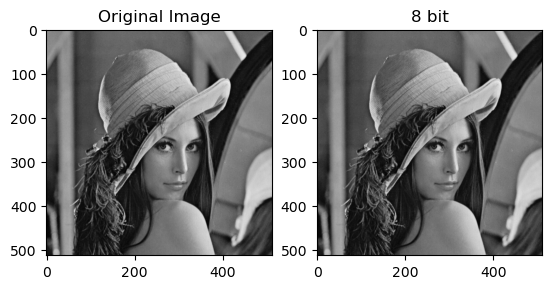

In [24]:
# 8 bit 重构
Buffer_d = np.zeros((h * w), dtype=np.uint8)
Buffer_y = img.reshape(h * w)
Buffer_r = Buffer_d
DPCM(Buffer_y, Buffer_d, Buffer_r, h, w, 8)
Buffer_d = Buffer_d.reshape(h, w)
Buffer_r = Buffer_r.reshape(h, w)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(Buffer_r, cmap="gray")
plt.title('8 bit')
print("PSNR: " + str(PSNR(img, Buffer_r))  +"SSIM: " + str(ssim(img, Buffer_r, multichannel=True)))